In [53]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.signal as ss

from scipy.optimize import curve_fit

import scipy.constants as c

In [33]:
data = np.loadtxt("test1_1000_H.csv", delimiter=',', skiprows=10)

t_vals = data[:, 0]
V_vals = -data[:, 1]

t_adjusted = t_vals - np.full_like(t_vals, min(t_vals))

t_clipped = t_adjusted[:-58]

# wavelength_A = (t_clipped*1.667 + np.full_like(t_clipped, 650*6)) 

wavelength_nm = np.full_like(t_clipped, 550*6/10-12) + t_clipped*10

#wavelength_nm_clipped = wavelength_nm
V_vals_clipped = V_vals[:-58]

#len(wavelength_nm_clipped)

print((t_clipped))
print(wavelength_nm)


[0.000e+00 2.000e-02 4.000e-02 ... 4.258e+01 4.260e+01 4.262e+01]
[318.  318.2 318.4 ... 743.8 744.  744.2]


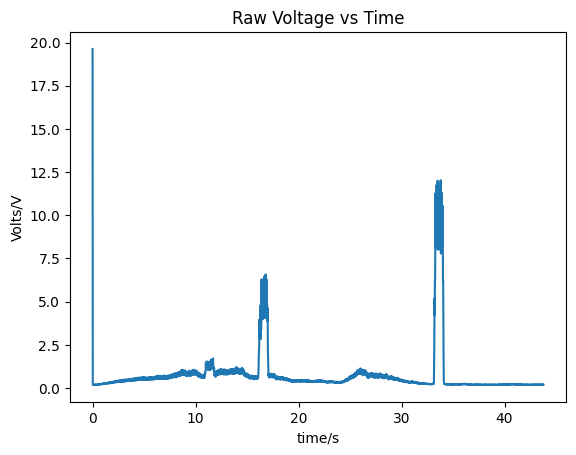

In [34]:
plt.plot(t_adjusted,V_vals)
plt.xlabel('time/s')
plt.ylabel('Volts/V')
plt.title('Raw Voltage vs Time')
plt.show()

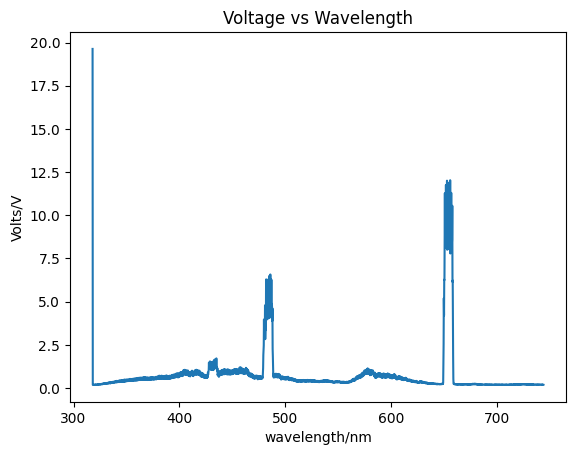

In [35]:


plt.plot(wavelength_nm,V_vals_clipped)
plt.xlabel('wavelength/nm')
plt.ylabel('Volts/V')
plt.title('Voltage vs Wavelength')
plt.show()

In [43]:
wavelength_nm_clipped = wavelength_nm[10:]
V_vals_clipped1 = V_vals_clipped[10:]

peak_idx, _ = ss.find_peaks(V_vals_clipped1, height=1.3, width=4)

peak_vals = []
V_peak_vals = []

for idx in peak_idx:

    peak_vals.append(wavelength_nm_clipped[int(idx)])
    V_peak_vals.append(V_vals_clipped1[int(idx)])



print(len(peak_vals))

3


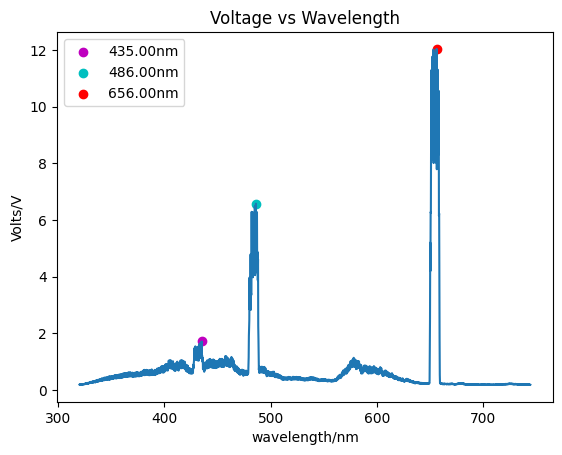

In [44]:
plt.plot(wavelength_nm_clipped,V_vals_clipped1)
colors = np.array(['m','c','r'])
for i in range(len(peak_vals)):
    plt.scatter(peak_vals[i], V_peak_vals[i], c=colors[i], label=f"{peak_vals[i]:.2f}nm")
plt.xlabel('wavelength/nm')
plt.ylabel('Volts/V')
plt.title('Voltage vs Wavelength')
plt.legend()
plt.show()

In [45]:
print(peak_vals)

[np.float64(435.0), np.float64(486.0), np.float64(656.0)]


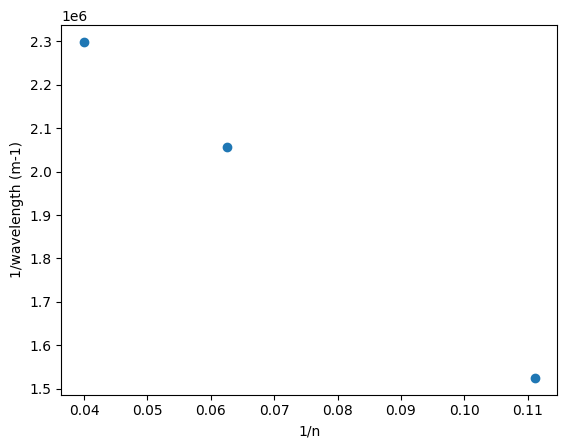

In [66]:
one_over_n_squared = np.array([1/5**2, 1/4**2, 1/3**2])

plt.scatter(one_over_n_squared, 1/(np.array(peak_vals)*1e-9))
plt.ylabel('1/wavelength (m-1)')
plt.xlabel('1/n')
plt.show()

In [63]:
def rydberg(x, m, c):

    return m*x + c


y_data = 1/(np.array(peak_vals) * 1e-9)
x_data = np.array([1/5**2, 1/4**2, 1/3**2])

popt, pcov = curve_fit(rydberg, x_data, y_data)

m = popt[0]
c1 = popt[1]

m_err = np.diag(pcov)[0]
c_err = np.diag(pcov)[1]

print(f'm = {m:.3e} pm {m_err:.3e}')
print(f'c = {c1:.3e} pm {c_err:.3e}')

m = -1.090e+07 pm 3.499e+09
c = 2.737e+06 pm 2.082e+07


In [69]:
R_from_m = - m
R_from_c =  4 * c1

print(f'R from m = {R_from_m:.3e} pm {m_err:.3e} m-1')
print(f'R from c = {R_from_c:.3e} pm {c_err*4:.3e} m-1')


R from m = 1.090e+07 pm 3.499e+09 m-1
R from c = 1.095e+07 pm 8.329e+07 m-1


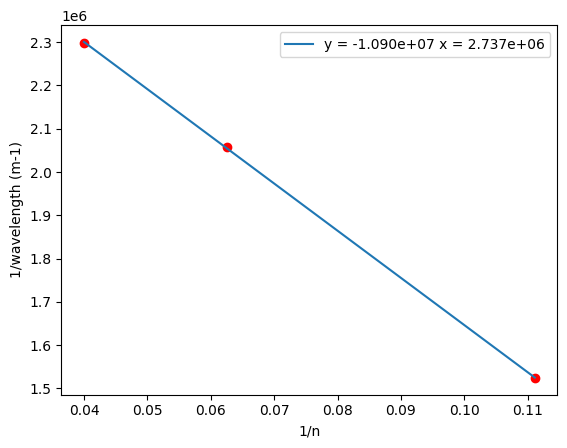

In [71]:
nvals = np.linspace(min(x_data), max(x_data))

y_fit = rydberg(nvals, m, c1)

plt.scatter(one_over_n_squared, 1/(np.array(peak_vals)*1e-9),c='r')
plt.plot(nvals, y_fit, label=f'y = {m:.3e} x = {c1:.3e}')
plt.ylabel('1/wavelength (m-1)')
plt.xlabel('1/n')
plt.legend()
plt.show()